# Unsupervised Learning 

This  lab session focuses on excercising unsupervised learning algorithm using Scikit-learn.

In Tuesday's class you had an opportunity to learn about the clustering, different methodologies and metrics for performance evaluation. 

Datasets: blobs, moons and UCI wine red dataset.

Useful Links: http://scikit-learn.org/stable/index.html

In [192]:
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline 


import seaborn as sns
sns.set_style("whitegrid")

## Clustering

Read through section 7.2.3 of the textbook. 



### Q1.  Load and Visualize the Blobs data

In [193]:
# Lets make use of the sklearn datasets - make blobs and moons
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt

"""
use make blobs with 150 samples, 3 centers, 2 features, std. dev of  0.6, 
shuffle = True, and random state = 1
"""
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.6, 
                  shuffle=True, random_state=1)

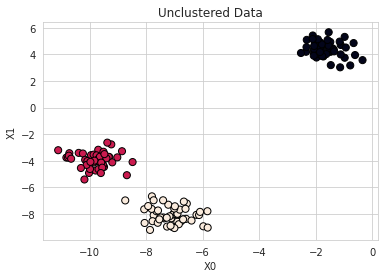

In [194]:
# EDA 
# use plt.scatter to visualize the blobs data set
plt.scatter(X[:,0], X[:,1], c =y, marker='o', s=50, edgecolor='k')
plt.title("Unclustered Data")
plt.xlabel("X0")
plt.ylabel("X1");

### Q2. K-means clustering

Here you will become familiar with using K-means clustering.

The KMeans method is available in `scikit-learn`:  
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

Examine the parameters options that you have with KMeans. 



In [195]:
# Import KMeans from sklearn, 
# Try running KMeans for different numbers of Groups (1 - 5) 

from sklearn.cluster import KMeans

''' Based on your understanding from the kmeans parameters in the link, 
select the parameters accordingly but make random_state = 0'''
for i in range(1,6):
  km = KMeans(init="k-means++", n_clusters=i, n_init=20, random_state=0)
  y_km = km.fit_predict(X)


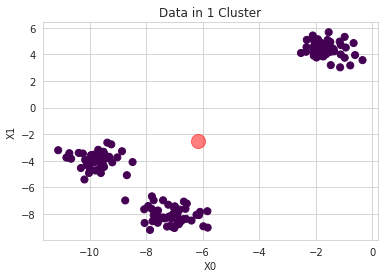

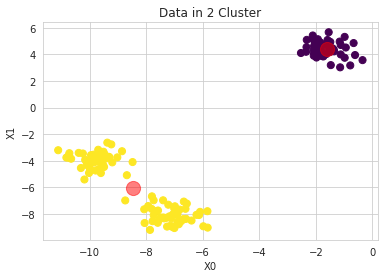

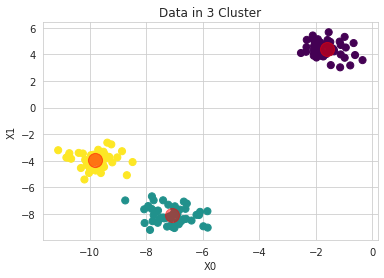

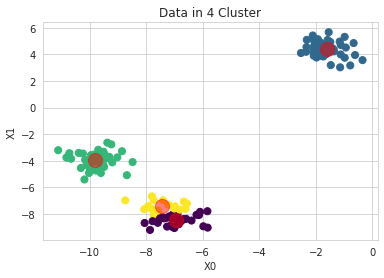

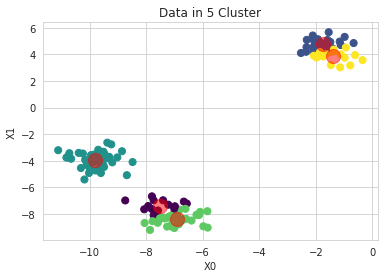

In [196]:
# Use scatter plot matrix to visualize the samples and the centroids
# plot samples for cluster in range 1 to 5
for i in range(1,6):
  km = KMeans(init="k-means++", n_clusters=i, n_init=20, random_state=0)
  y_km, centers = km.fit_predict(X), km.cluster_centers_
  plt.scatter(X[:, 0], X[:, 1], c=y_km, s=50, cmap='viridis')
  plt.scatter(centers[:, 0], centers[:, 1], c='r', s=200, alpha=0.5)
  plt.title("Data in "+str(i)+" Cluster")
  plt.xlabel("X0")
  plt.ylabel("X1")
  plt.show()

Let's now loook to evaluate the model and quantify the quality of the clustering.  From the textbook/class you were introduced to different metrics or measures - Rand Index, Homogeneity, Completeness, V-measures, Silhouette scores, etc. 


### Q3. Quantify Clustering Quality 

For the above model, let's evaluate the within-cluster SSE (also known as distortion) and visualize it for different clusters (1-10). 

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://scikit-learn.org/stable/modules/clustering.html


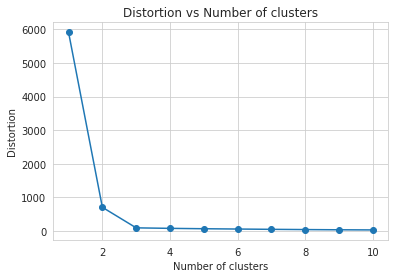

In [197]:
''' Using for loop, fit the kmeans models for n-clusters from 1 to 10, 
let random state be 0, maxx iter = 100, n_init = 10.

Step 1: initialize the model
Step 2: fit the model
Step 3: internal model of kmeans has one of the attributes as interia_, 
        append these and plot after looped out.
'''


distortions = []
for i in range(1, 11):
    km = KMeans(init="k-means++", n_clusters=i, n_init=10, random_state=0,
                max_iter=100)
    km.fit(X)
    distortions.append(km.inertia_)

    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Distortion vs Number of clusters')
plt.show()


### Clustering Quality - Silhouette Plots

Check the performance of kMeans using Silhouette plots. Try for different values of n_clusters. When is it good and when does it go bad??

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html

http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

In [198]:
'''silhouette is to be imported from metrics package'''

from sklearn.metrics import silhouette_samples

In [199]:
''' The second link provided above, selecting the no of cluster i.e., unlabeled 
targets based on silhouette is discussed. Further, in the below cell, initialize 
the model, fit and make necessaary changes to the code to display a plot
'''
import pandas as pd
x=[]
for i in range(2,11):
  km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, 
              random_state=0)
  y_km = km.fit_predict(X)

  cluster_labels = np.unique(y_km)
  n_clusters = cluster_labels.shape[0]
  silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
  
  x.append([i,np.average(silhouette_vals)])
  #print(f'''For n_clusters = {i} The average silhouette_score is : 
   #    {np.average(silhouette_vals)}''')

df=pd.DataFrame(x,columns=['n_clusters','average silhouette_score'])  
df=df.sort_values(by="average silhouette_score", ascending=False)
df

,n_clusters,average silhouette_score
1,3,0.830972
0,2,0.815027
2,4,0.684034
3,5,0.489409
8,10,0.372052
5,7,0.362275
7,9,0.355600
6,8,0.345455
4,6,0.332492


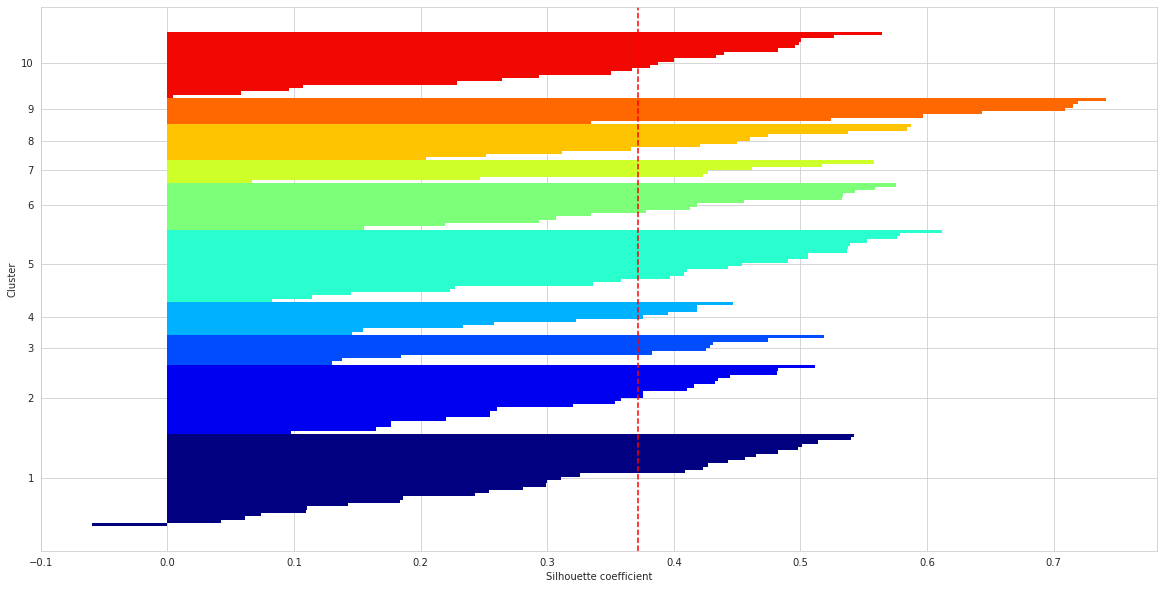

In [200]:
""" No modification needed"""

y_ax_lower, y_ax_upper = 0, 0
yticks = []
plt.figure(figsize=(20,10))
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [201]:
print("Good performance of kMeans using average silhouette_score: \n")
df.iloc[[0]]

Good performance of kMeans using average silhouette_score: 



,n_clusters,average silhouette_score
1,3,0.830972


In [202]:
print("Bad performance of kMeans using average silhouette_score: \n")
df.iloc[[-1]]

Bad performance of kMeans using average silhouette_score: 



,n_clusters,average silhouette_score
4,6,0.332492


### Q4. Hierarchical Clustering 

Let's now look at performing hierarchical clustering and we will make use of the moons data set. 

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [203]:
''' * Lets use make_moons.
    * use sample size = 300, noise = 5%, random state = 0
    * from link above for agc intialize the agglomerative clustering with 
       no of cluster =2 and complete linkage'''
from sklearn.cluster import AgglomerativeClustering
X, y = make_moons(n_samples=300, noise=0.05, random_state=0)
agc = AgglomerativeClustering(n_clusters=2, linkage='complete')

# use fit_predict and print the cluster output
y_agc = agc.fit_predict(X)
print('Cluster labels: %s' % y_agc)

Cluster labels: [0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1
 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0
 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 1 0 0]


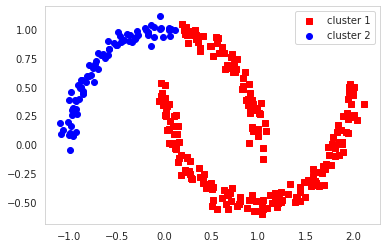

In [204]:
""" Similar to the kMeans, visulize the cluster type for the sample"""
plt.scatter(X[y_agc==0,0], X[y_agc ==0,1], c='red', marker='s', 
            label='cluster 1')
plt.scatter(X[y_agc ==1,0],X[y_agc ==1,1], c='blue', marker='o', 
            label='cluster 2')
plt.legend()
plt.grid()
plt.show()

From the plot of the moons data the Agglomerative clustering method is not efficient (neither is Kmeans).  This is because the cluster have a non-convex shape. 

### Other Clustering Methods

Let's look to use another clustering methods DBSCAN (not discussed in class).  DBSCAN handles clustering data of arbitrary shapes efficiently. 

http://scikit-learn.org/stable/modules/clustering.html#dbscan

In [205]:
''' Import DBscan from sklearn, use eps = 0.2, min_samples = 5, metric = 'euclidean' '''

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

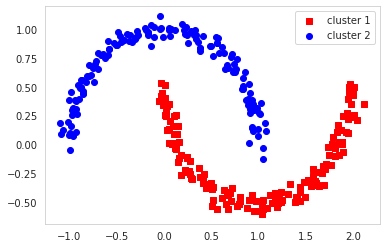

In [206]:
''' Doing same thing but for DBSCAN'''
plt.scatter(X[y_db==0,0], X[y_db ==0,1], c='red', marker='s', label='cluster 1')
plt.scatter(X[y_db ==1,0],X[y_db ==1,1], c='blue', marker='o',label='cluster 2')
plt.legend()
plt.grid()
plt.show()

### Q5. Evaluate Cluster Performance 

http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

Evaluate, the Kmeans, Hierarchical and DBScan method on the moons data set, using the various metrics below.  Note, they may not all be applicable to each clustering method.

In [207]:
''' Using piece of code from class, evaluate the performance of all the 
above clustering techniques'''
from sklearn import metrics
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, 
            tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

print('Final evaluation of the clustering: K-Means')
print('Inertia: %.2f' %  km.inertia_ )
print('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y,km.labels_))
print('Homogeneity %.2f' %  metrics.homogeneity_score(y,km.labels_))
print('Completeness %.2f' %  metrics.completeness_score(y,km.labels_))
print('V_measure %.2f' %  metrics.v_measure_score(y, km.labels_))
print('Silhouette %.2f' % metrics.silhouette_score(X, km.labels_,
                                                   metric='euclidean'))

Final evaluation of the clustering: K-Means
Inertia: 82.12
Adjusted_rand_score 0.28
Homogeneity 0.43
Completeness 0.28
V_measure 0.34
Silhouette 0.42


In [208]:
agc = AgglomerativeClustering(n_clusters=2, linkage='complete')
y_agc = agc.fit_predict(X)

print('Final evaluation of the clustering: Hier ')

print('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y,agc.labels_))
print('Homogeneity %.2f' %  metrics.homogeneity_score(y,agc.labels_))
print('Completeness %.2f' %  metrics.completeness_score(y,agc.labels_))
print('V_measure %.2f' %  metrics.v_measure_score(y, agc.labels_))
print('Silhouette %.2f' % metrics.silhouette_score(X, agc.labels_,
                                                   metric='euclidean'))

Final evaluation of the clustering: Hier 
Adjusted_rand_score 0.30
Homogeneity 0.35
Completeness 0.41
V_measure 0.38
Silhouette 0.44


In [209]:
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

print('Final evaluation of the clustering:DBSCAN ')
#print('Inertia: %.2f' %  db.inertia_ )
print('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y,y_db))
print('Homogeneity %.2f' %  metrics.homogeneity_score(y,y_db))
print('Completeness %.2f' %  metrics.completeness_score(y,y_db))
print('V_measure %.2f' %  metrics.v_measure_score(y, y_db))
print('Silhouette %.2f' % metrics.silhouette_score(X, y_db,metric='euclidean'))

Final evaluation of the clustering:DBSCAN 
Adjusted_rand_score 1.00
Homogeneity 1.00
Completeness 1.00
V_measure 1.00
Silhouette 0.33


## Wine Data Clustering 

From UCI repository, download the wine dataset and apply k-Means and HCA

https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

In [210]:
''' Lets try on the real dataset.
we have used the wine dataset earlier. we would be using this for clustering 
application and since we know that the target group 
is the wine quality and is a part of this dataset in the link'''

'''From the url given, import the dataset using pd.read_csv,
make necessary changes for successfully reading this data
update the column names with the data description given in the UCI link'''

url  =  "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data" 
wine = pd.read_csv(url,sep = ',', header=None)
wine.columns = ['class', 'Alcohol','Malic acid','Ash','Alcalinity of ash' ,
                'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols',
                'Proanthocyanins','color intensity','Hue','OD280/OD315 of diluted wines',
                'Proline']

In [211]:
''' since, target class is also part of the data, slice the data and assign the 
target to y and remaining data to variable X'''
X = wine.loc[ : , wine.columns != 'class']
y = wine.iloc[:,0] 

In [212]:
wine.describe()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Q6.  Kmeans clustering with Wine data 

Apply the kmeans clustering for the wine dataset. 



In [213]:
''' Use the excercises above for wine dataset and apply kMeans'''
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, 
            tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

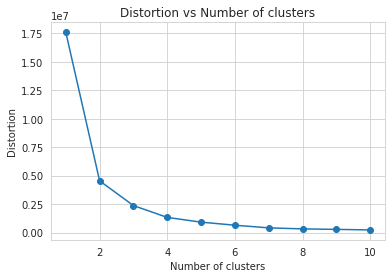

In [214]:
# Visualize the number of clusters preferred for the wine data set 
#  plot distortion vs. number of clusters (1-10)

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, 
            tol=1e-04, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Distortion vs Number of clusters')
plt.show()

In [215]:
# Evaluate the clustering performance: inertia, rand_score, etc.
#  for the best number of clusters judged from your answer above.

import pandas as pd
from sklearn import metrics
x=[]
for i in range(2,11):
  km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, 
            tol=1e-04, random_state=0)
  y_km = km.fit_predict(X)

  cluster_labels = np.unique(y_km)
  n_clusters = cluster_labels.shape[0]
  silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
  
  x.append([i,np.average(silhouette_vals)])

df=pd.DataFrame(x,columns=['n_clusters','average silhouette_score'])  
df=df.sort_values(by="average silhouette_score", ascending=False)

# Performance based on best cluster.
best_cluster=df.iloc[0,0]             #Best cluster selection based on above ans
km = KMeans(n_clusters=best_cluster, init='random', n_init=10, max_iter=300, 
            tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

print('Evaluation of the clustering performance:')
print("Best no of cluster:", best_cluster)
print('Inertia: %.2f' %  km.inertia_ )
print('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y,km.labels_))
print('Homogeneity %.2f' %  metrics.homogeneity_score(y,km.labels_))
print('Completeness %.2f' %  metrics.completeness_score(y,km.labels_))
print('V_measure %.2f' %  metrics.v_measure_score(y, km.labels_))
print('Silhouette %.2f' %  metrics.silhouette_score(X, km.labels_,
                                                    metric='euclidean'))

Evaluation of the clustering performance:
Best no of cluster: 2
Inertia: 4543749.61
Adjusted_rand_score 0.37
Homogeneity 0.33
Completeness 0.59
V_measure 0.43
Silhouette 0.66


### Q7. Standardize Data 

Rerun the analysis from Q6 (plots + clustering performance measure), but first standardize the data so that it all has mean = 0, std = 1.

In [216]:
from sklearn import preprocessing
 
scaler = preprocessing.StandardScaler().fit(X)
Xnew = scaler.transform(X)

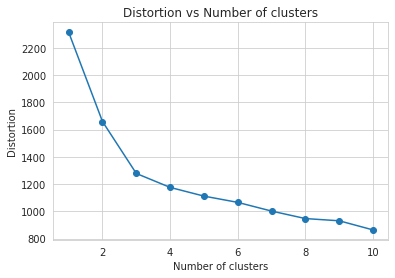



Evaluation of the clustering performance:
Best no of cluster: 3
Inertia: 1277.93
Adjusted_rand_score 0.90
Homogeneity 0.88
Completeness 0.87
V_measure 0.88
Silhouette 0.28


In [217]:
##Reruning the analysis from Q6 (plots + clustering performance measure)

## 1) Plots:
# Visualize the number of clusters preferred for the wine data set 
#  plot distortion vs. number of clusters (1-10)

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, 
            tol=1e-04, random_state=0)
    km.fit(Xnew)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Distortion vs Number of clusters')
plt.show()



## 2) Best clustering performance measure:
# Evaluate the clustering performance: inertia, rand_score, etc.
#  for the best number of clusters judged from your answer above.

import pandas as pd
from sklearn import metrics
x=[]
for i in range(2,11):
  km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, 
            tol=1e-04, random_state=0)
  y_km = km.fit_predict(Xnew)

  cluster_labels = np.unique(y_km)
  n_clusters = cluster_labels.shape[0]
  silhouette_vals = silhouette_samples(Xnew, y_km, metric='euclidean')
  
  x.append([i,np.average(silhouette_vals)])

df=pd.DataFrame(x,columns=['n_clusters','average silhouette_score'])  
df=df.sort_values(by="average silhouette_score", ascending=False)

# Performance based on best cluster.
best_cluster=df.iloc[0,0]             #Best cluster selection based on above ans
km = KMeans(n_clusters=best_cluster, init='random', n_init=10, max_iter=300, 
            tol=1e-04, random_state=0)
y_km = km.fit_predict(Xnew)

print('\n\nEvaluation of the clustering performance:')
print("Best no of cluster:", best_cluster)
print('Inertia: %.2f' %  km.inertia_ )
print('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y,km.labels_))
print('Homogeneity %.2f' %  metrics.homogeneity_score(y,km.labels_))
print('Completeness %.2f' %  metrics.completeness_score(y,km.labels_))
print('V_measure %.2f' %  metrics.v_measure_score(y, km.labels_))
print('Silhouette %.2f' %  metrics.silhouette_score(Xnew, km.labels_,
                                                    metric='euclidean'))

### Hierarchical clustering Dendrogram

Let's use the hierarchical clustering method to create a dendrogram plot 

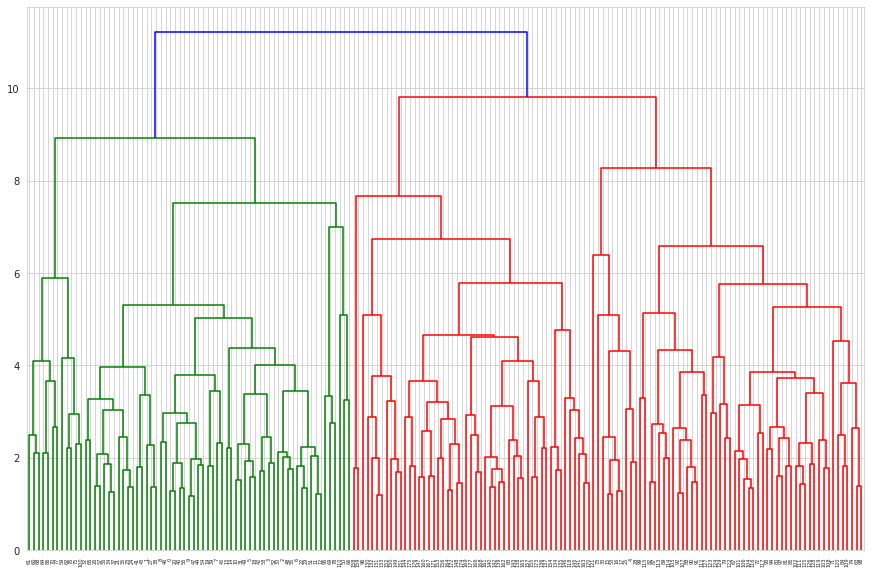

In [218]:
sns.set_style("whitegrid")

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

dist = pdist(Xnew,'euclidean')
linked = linkage(Xnew, 'complete')
# linkage_matrix = linkage(dist, method = 'complete');
plt.figure()  # we need a wide figure
fig = plt.gcf()
fig.set_size_inches((15,10))
dendrogram(linked, orientation="top", color_threshold = 10,
           distance_sort='descending', show_leaf_counts=True)

plt.show()